In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(style="whitegrid")

In [2]:
order_item = pd.read_csv("../../../downloads/olist_redefined/order_item.tsv", sep='\t').drop_duplicates()
order_item

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e5fa5a7210941f7d56d0208e4e071d35,1,f3c2d01a84c947b078e32bbef0718962,a425f92c199eb576938df686728acd20,2016-09-19 00:15:34,59.50,15.56
1,bfbd0f9bdef84302105ad712db648a6c,1,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83
2,bfbd0f9bdef84302105ad712db648a6c,2,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83
3,bfbd0f9bdef84302105ad712db648a6c,3,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83
4,cd3b8574c82b42fc8129f6d502690c3e,1,e2a1d45a73dc7f5a7f9236b043431b89,b499c00f28f4b7069ff6550af8c1348a,2016-10-08 10:34:01,29.99,10.96
...,...,...,...,...,...,...,...
112645,3b61aab5de69abc1731138bd104a777f,1,6aa063e063f2ab982b471e58afe06d72,610f72e407cdd7caaa2f8167b0163fd8,2018-09-18 21:10:15,999.99,24.77
112646,9c94a4ea2f7876660fa6f1b59b69c8e6,1,282b126b2354516c5f400154398f616d,7a241947449cc45dbfda4f9d0798d9d0,2020-02-03 20:23:22,75.99,14.70
112647,13bdf405f961a6deec817d817f5c6624,1,96ea060e41bdecc64e2de00b97068975,7a241947449cc45dbfda4f9d0798d9d0,2020-02-05 03:30:51,69.99,14.66
112648,c2bb89b5c1dd978d507284be78a04cb2,1,87b92e06b320e803d334ac23966c80b1,7a241947449cc45dbfda4f9d0798d9d0,2020-04-09 22:35:08,99.99,61.44


In [3]:
order_status = pd.read_csv("../../../downloads/olist_redefined/order_status.tsv", sep='\t').drop_duplicates()
delivered_order_id = order_status[order_status['status'] == 'delivered_customer']['order_id']

In [4]:
delivered_order_item = order_item[order_item['order_id'].isin(delivered_order_id)]
delivered_order_detail = delivered_order_item.drop(['shipping_limit_date', 'freight_value', 'seller_id'], axis=1)
delivered_order_detail

,order_id,order_item_id,product_id,price
1,bfbd0f9bdef84302105ad712db648a6c,1,5a6b04657a4c5ee34285d1e4619a96b4,44.99
2,bfbd0f9bdef84302105ad712db648a6c,2,5a6b04657a4c5ee34285d1e4619a96b4,44.99
3,bfbd0f9bdef84302105ad712db648a6c,3,5a6b04657a4c5ee34285d1e4619a96b4,44.99
4,cd3b8574c82b42fc8129f6d502690c3e,1,e2a1d45a73dc7f5a7f9236b043431b89,29.99
5,c3d9e402b6a0fbe2a5f7fc5b41117c38,1,817e1c2d22418c36386406ccacfa53e8,189.00
...,...,...,...,...
112643,1afe384f199748cff7a42c9902065560,1,4c2a4020fcd651812100ebbeac1b2753,599.99
112644,7cfdf7265c9572fc7b7cbd3b9cc438b7,2,17e18b0c88a853dd6de3e48a7cfa9d9a,20.00
112645,3b61aab5de69abc1731138bd104a777f,1,6aa063e063f2ab982b471e58afe06d72,999.99
112648,c2bb89b5c1dd978d507284be78a04cb2,1,87b92e06b320e803d334ac23966c80b1,99.99


In [5]:
aggr_order_detail = delivered_order_detail.groupby(['product_id', 'price'], as_index=False).agg({'order_item_id': 'count'}).rename(columns={'order_item_id': 'quantity'}).sort_values('product_id')
aggr_order_detail['total_sales_amount'] = aggr_order_detail['price'] * aggr_order_detail['quantity']
aggr_order_detail

,product_id,price,quantity,total_sales_amount
0,00066f42aeeb9f3007548bb9d3f33c38,101.65,1,101.65
1,00088930e925c41fd95ebfe695fd2655,129.90,1,129.90
2,0009406fd7479715e4bef61dd91f2462,229.00,1,229.00
3,000b8f95fcb9e0096488278317764d19,58.90,2,117.80
4,000d9be29b5207b54e86aa1b1ac54872,199.00,1,199.00
...,...,...,...,...
41501,fff81cc3158d2725c0655ab9ba0f712c,90.00,1,90.00
41502,fff9553ac224cec9d15d49f5a263411f,32.00,1,32.00
41504,fffdb2d0ec8d6a61f0a0a0db3f25b441,34.99,4,139.96
41503,fffdb2d0ec8d6a61f0a0a0db3f25b441,29.99,1,29.99


In [6]:
redefined_aggr_order_detail = aggr_order_detail.groupby('product_id', as_index=False).agg({'total_sales_amount': 'sum', 'quantity': 'sum'}).sort_values('product_id')
redefined_aggr_order_detail['mean_price'] = redefined_aggr_order_detail['total_sales_amount'] / redefined_aggr_order_detail['quantity']
redefined_aggr_order_detail

,product_id,total_sales_amount,quantity,mean_price
0,00066f42aeeb9f3007548bb9d3f33c38,101.65,1,101.65
1,00088930e925c41fd95ebfe695fd2655,129.90,1,129.90
2,0009406fd7479715e4bef61dd91f2462,229.00,1,229.00
3,000b8f95fcb9e0096488278317764d19,117.80,2,58.90
4,000d9be29b5207b54e86aa1b1ac54872,199.00,1,199.00
...,...,...,...,...
32209,fff6177642830a9a94a0f2cba5e476d1,229.98,2,114.99
32210,fff81cc3158d2725c0655ab9ba0f712c,90.00,1,90.00
32211,fff9553ac224cec9d15d49f5a263411f,32.00,1,32.00
32212,fffdb2d0ec8d6a61f0a0a0db3f25b441,169.95,5,33.99


In [7]:
product = pd.read_csv("../../../downloads/olist_redefined/product.tsv", sep='\t').drop_duplicates()
product_category = product[['product_id', 'category']].dropna()

In [8]:
sales_product_category = pd.merge(redefined_aggr_order_detail, product_category, on='product_id', how='inner').sort_values('category')
sales_product_category.to_csv("tmp.tsv", sep='\t', index=False)

In [9]:
# 판매 

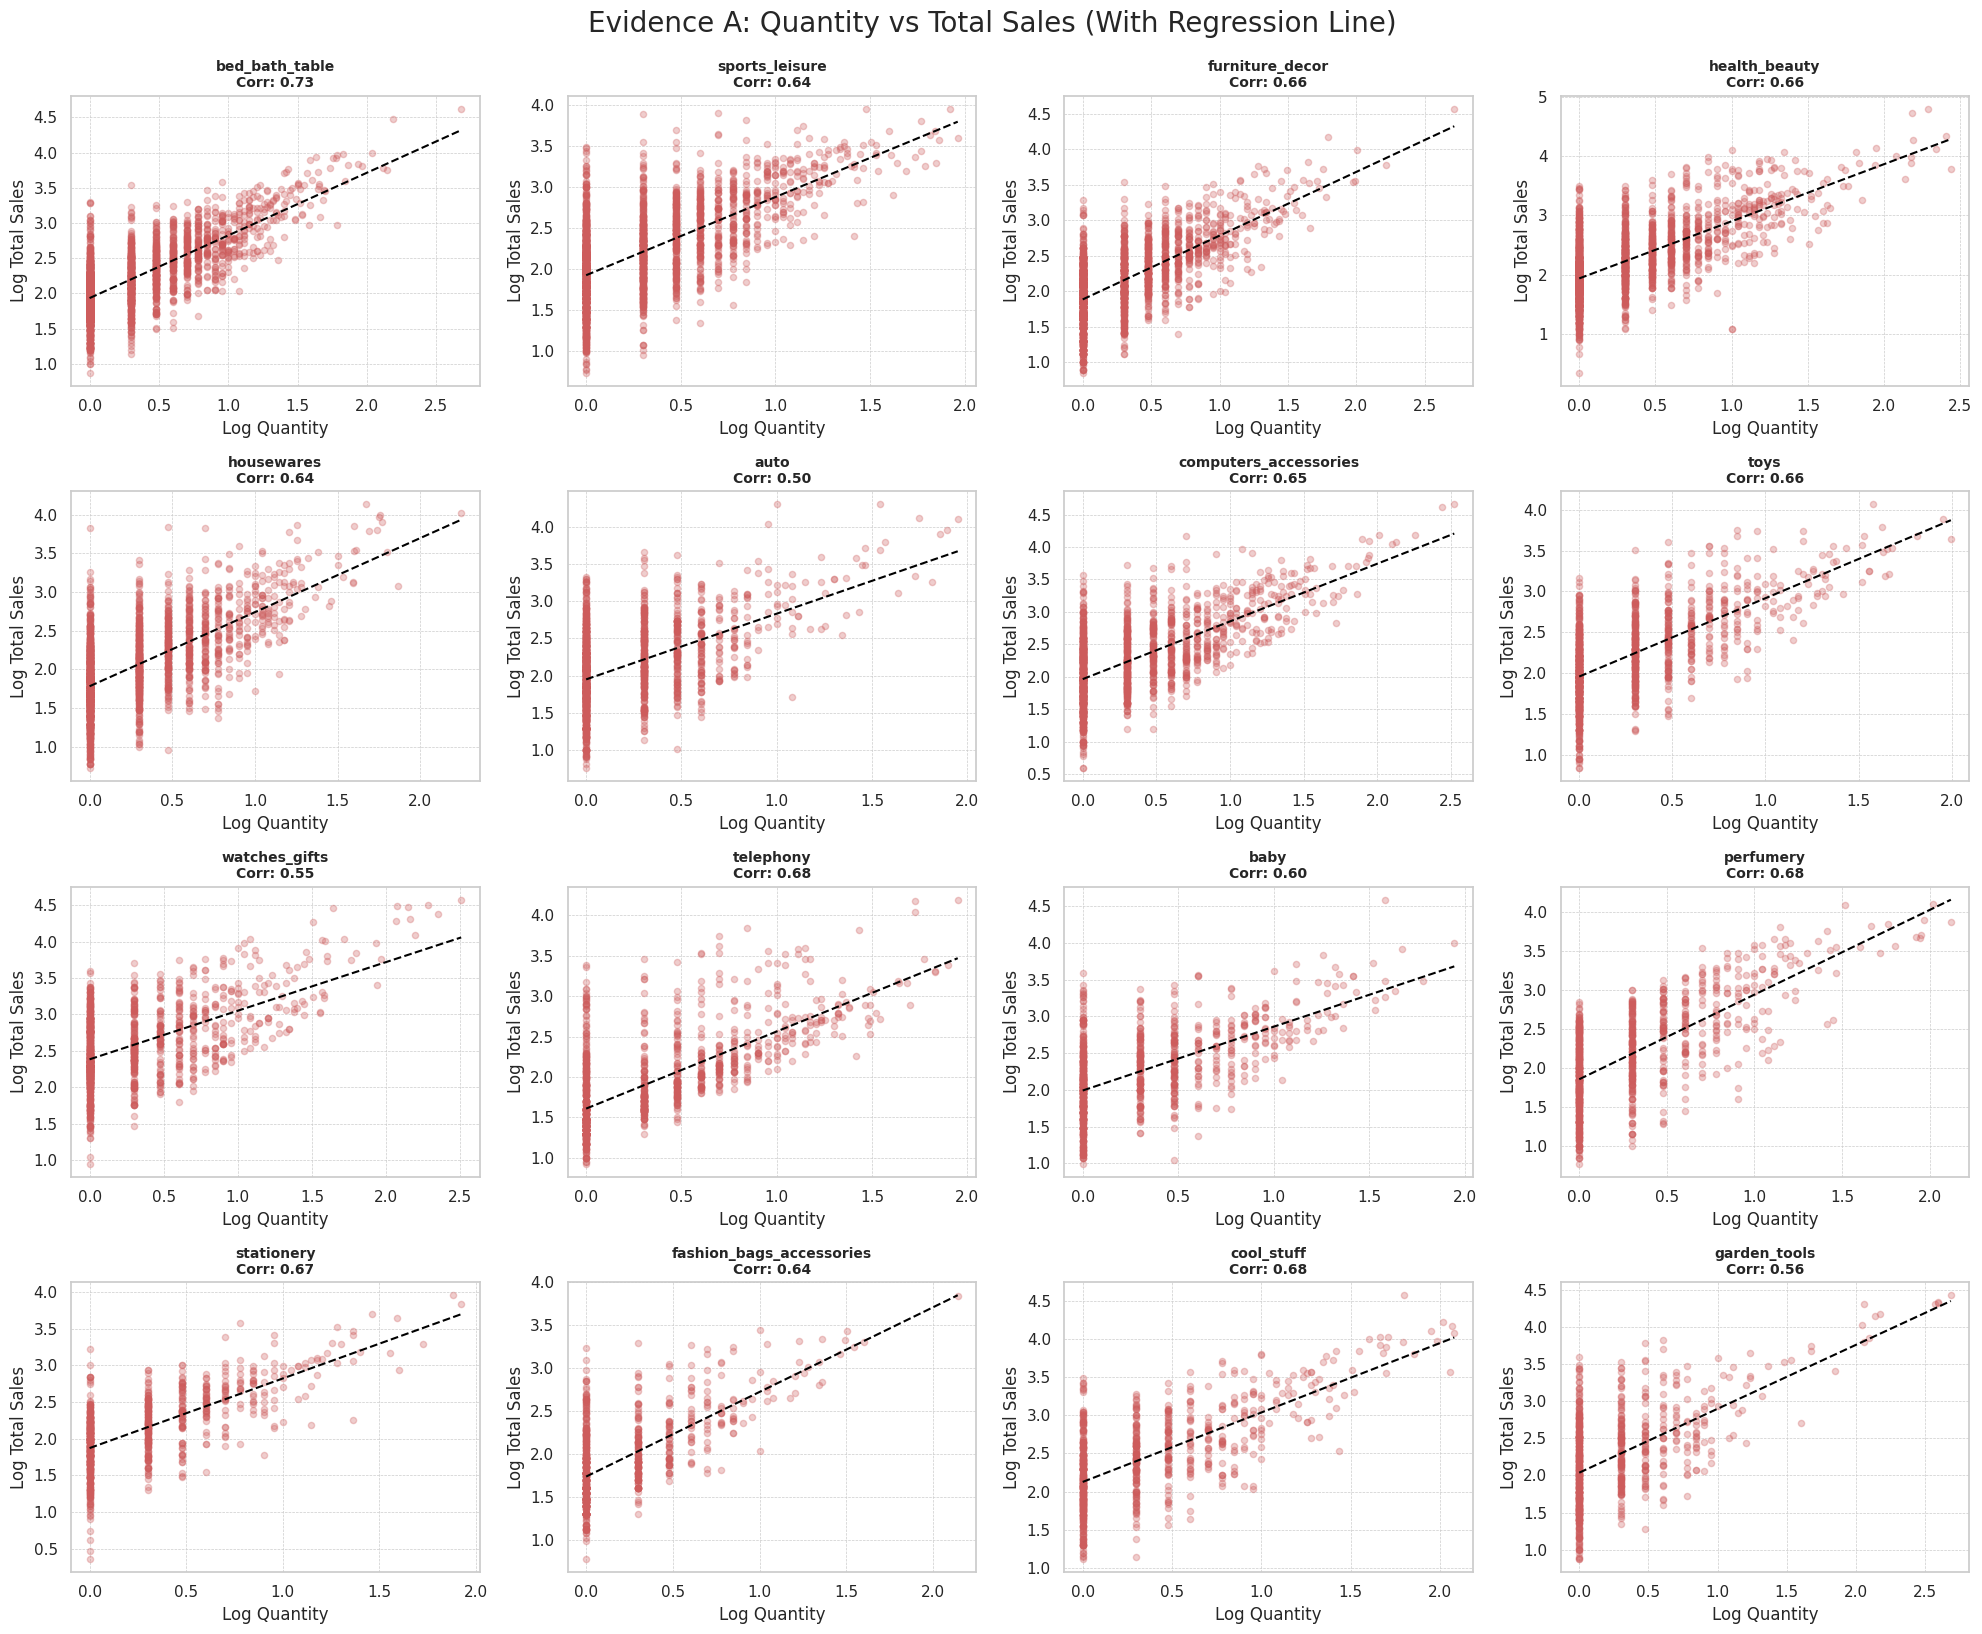

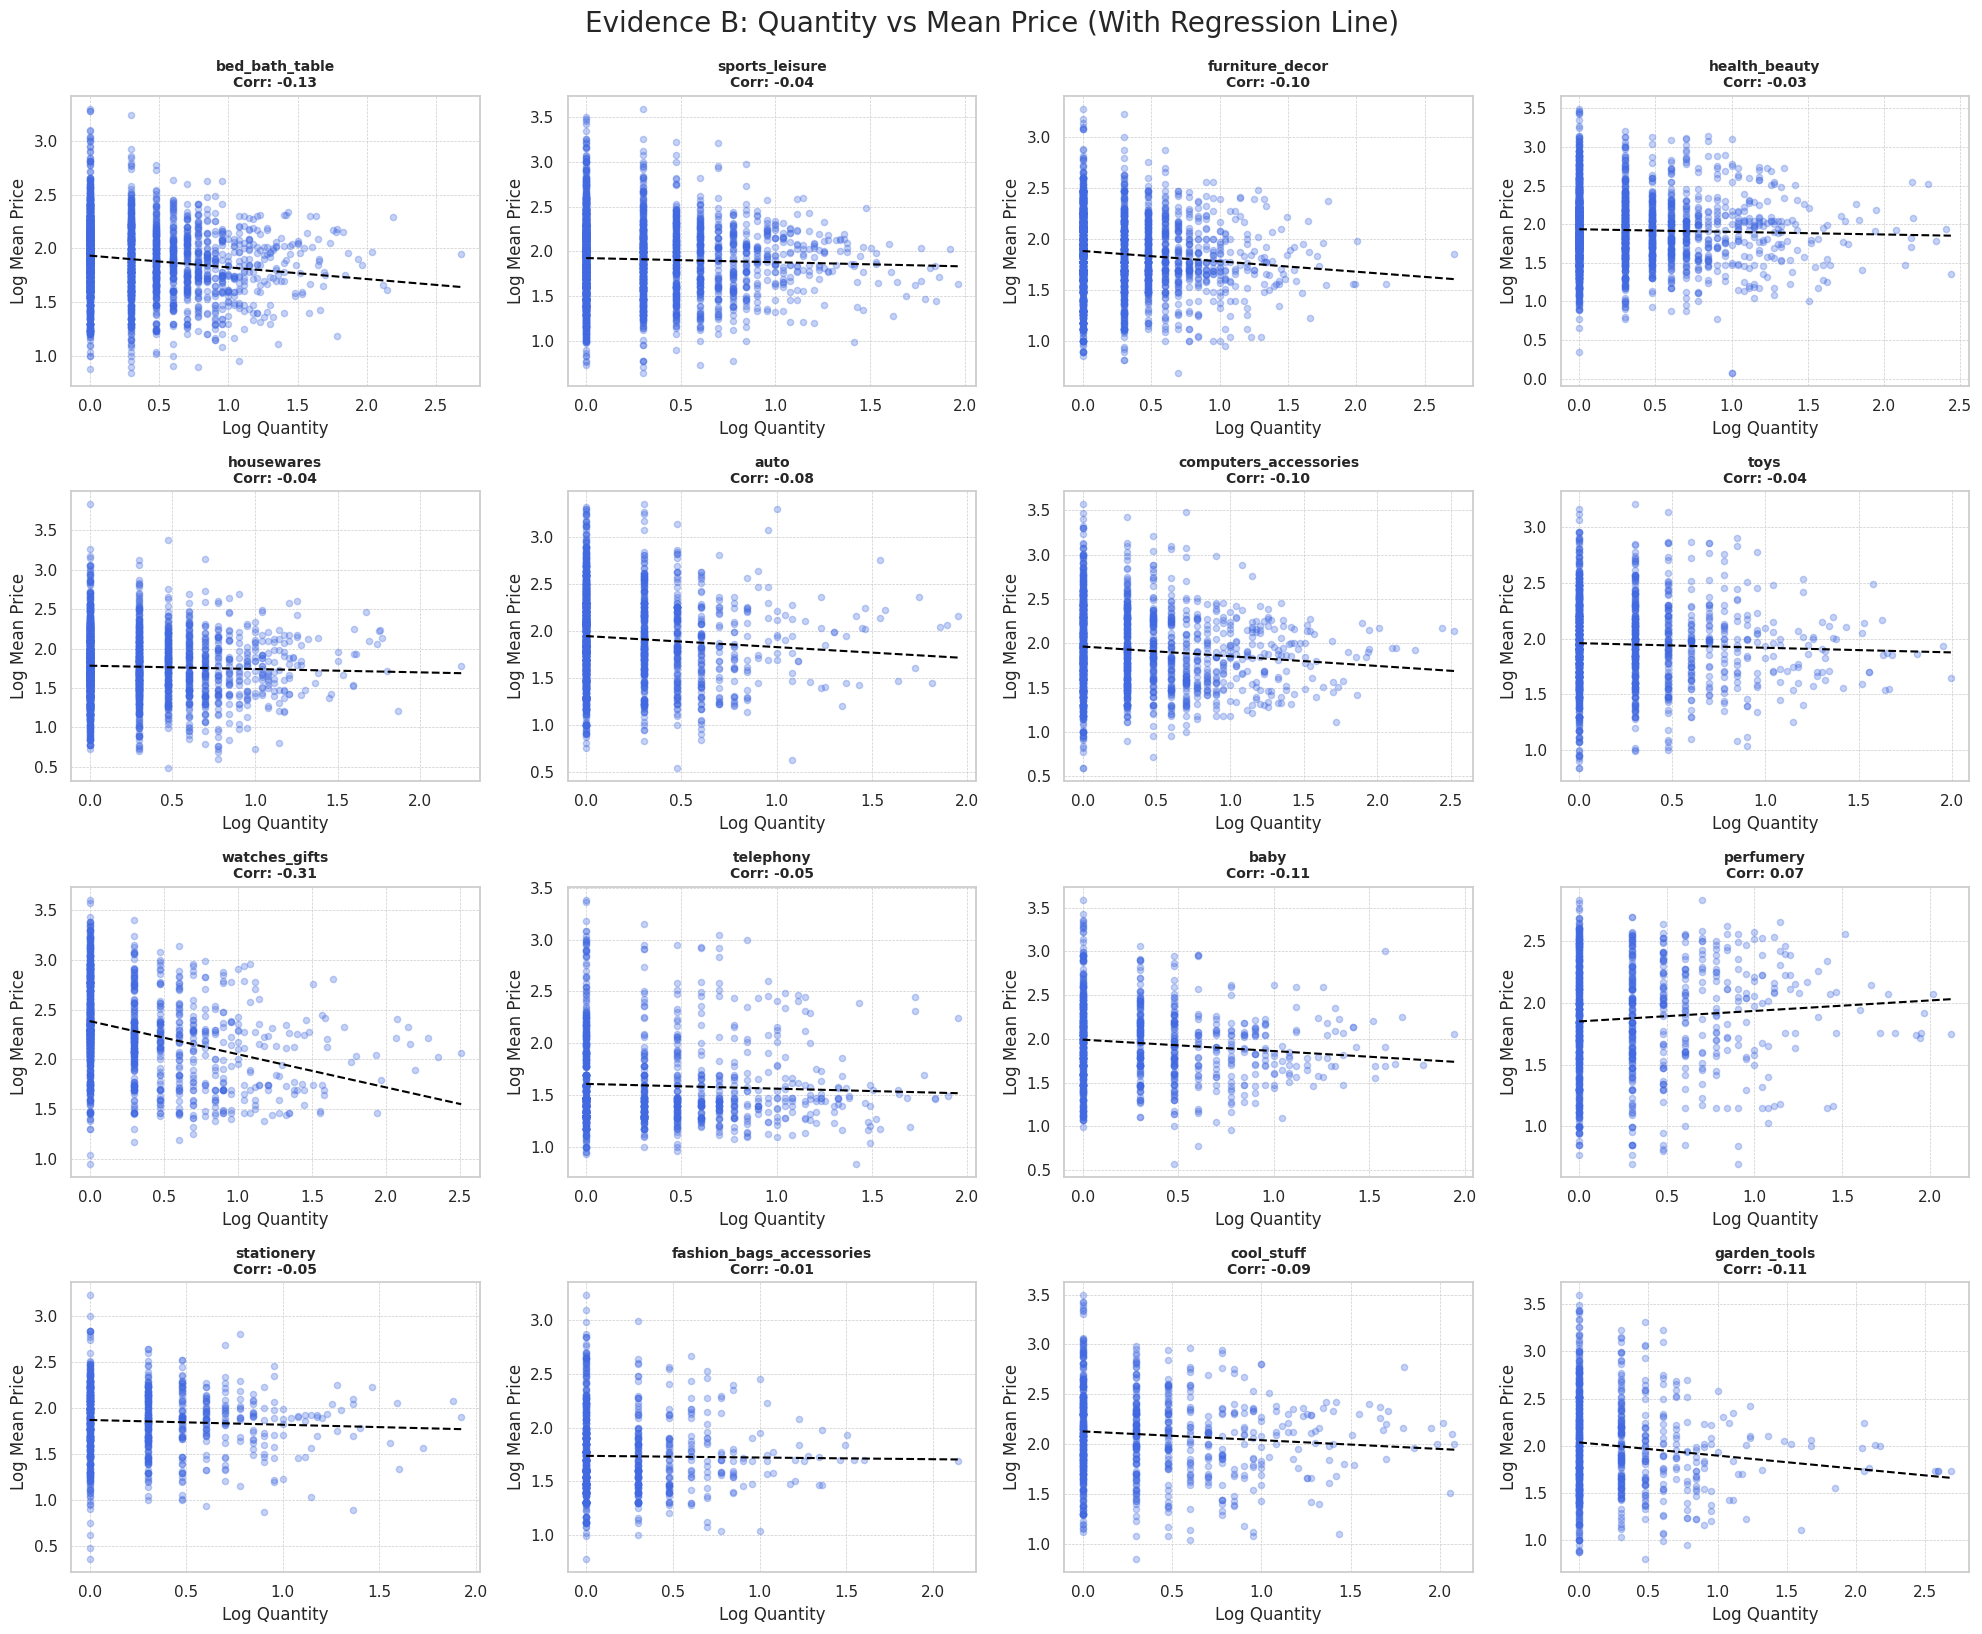

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. 데이터 로드
df = sales_product_category.copy()

# 2. 상위 16개 카테고리 추출 (전체 데이터의 패턴을 대변하는 샘플)
top_categories = df['category'].value_counts().nlargest(16).index
df_subset = df[df['category'].isin(top_categories)].copy()

# 3. 로그 변환 (Log Transformation)
# 데이터가 넓게 퍼져 있어 패턴을 잘 보기 위해 로그 스케일을 적용합니다.
# (로그 스케일에서의 선형 회귀는 멱함수 관계를 선형으로 보여줍니다)
df_subset['log_quantity'] = np.log10(df_subset['quantity'])
df_subset['log_sales'] = np.log10(df_subset['total_sales_amount'])
df_subset['log_price'] = np.log10(df_subset['mean_price'])

# 4. 시각화 함수 정의 (회귀선 포함)
def plot_evidence_with_regression(data, x_col, y_col, x_label, y_label, title_prefix, filename, color):
    # 카테고리 리스트 (데이터 많은 순)
    categories = data['category'].value_counts().index 
    
    # 4x4 서브플롯 생성
    fig, axes = plt.subplots(4, 4, figsize=(20, 16))
    axes = axes.flatten()
    
    for i, cat in enumerate(categories):
        ax = axes[i]
        cat_data = data[data['category'] == cat]
        
        # 상관계수 계산
        corr = cat_data[x_col].corr(cat_data[y_col])
        
        # regplot: 산점도 + 회귀선 그리기
        sns.regplot(
            data=cat_data, 
            x=x_col, 
            y=y_col, 
            ax=ax, 
            # 점 스타일 설정
            scatter_kws={'alpha': 0.3, 'color': color, 's': 20},
            # 선 스타일 설정 (검은색 점선)
            line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 1.5},
            ci=None # 신뢰구간 표시 제외 (깔끔하게 선만 표시)
        )
        
        # 그래프 꾸미기
        ax.set_title(f'{cat}\nCorr: {corr:.2f}', fontsize=10, fontweight='bold')
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        ax.grid(True, linestyle='--', linewidth=0.5)

    plt.tight_layout()
    plt.suptitle(f'{title_prefix}', y=1.02, fontsize=20)
    plt.savefig(filename, bbox_inches='tight')
    plt.show()

# 5. 실행: [Evidence A] 판매량 vs 매출 (강한 상관관계 -> 기울기 급함)
plot_evidence_with_regression(
    df_subset, 
    'log_quantity', 
    'log_sales', 
    'Log Quantity',
    'Log Total Sales',
    'Evidence A: Quantity vs Total Sales (With Regression Line)', 
    'evidence_qty_sales_reg.png',
    'indianred'
)

# 6. 실행: [Evidence B] 판매량 vs 단가 (상관관계 없음 -> 기울기 평평함)
plot_evidence_with_regression(
    df_subset, 
    'log_quantity', 
    'log_price',
    'Log Quantity',
    'Log Mean Price',
    'Evidence B: Quantity vs Mean Price (With Regression Line)', 
    'evidence_qty_price_reg.png',
    'royalblue'
)

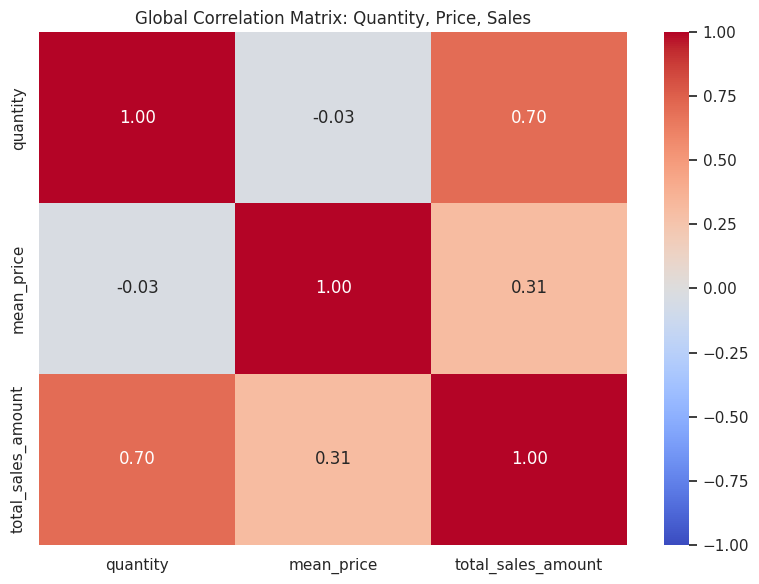

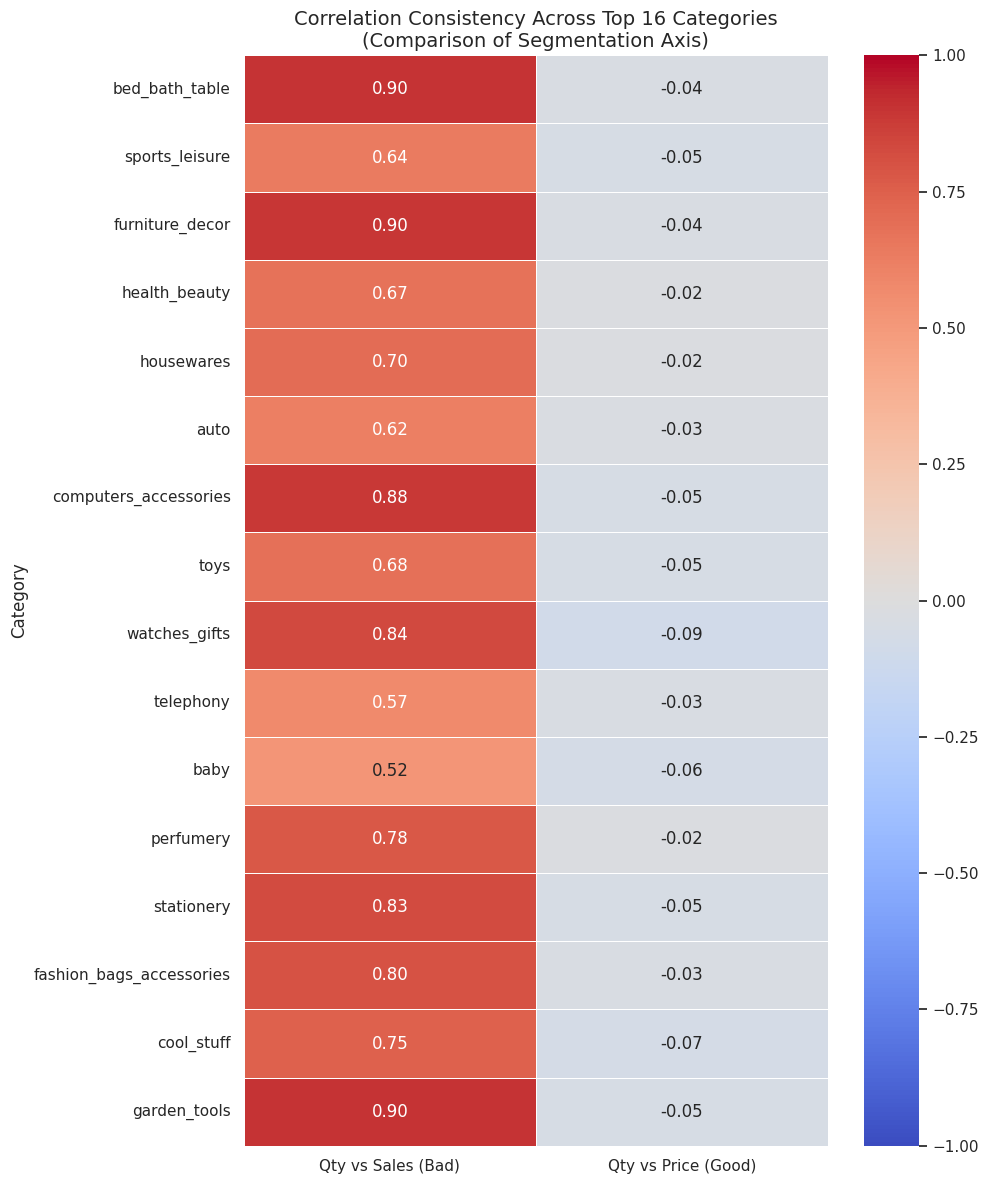

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 데이터 로드
# 탭으로 구분된 tsv 파일을 읽어옵니다.
df = sales_product_category.copy()

# -------------------------------------------------------
# 1. 전체 데이터 상관관계 히트맵 (Global Heatmap)
# -------------------------------------------------------
plt.figure(figsize=(8, 6))

# '판매량', '단가', '매출' 세 변수 간의 상관계수 계산
global_corr = df[['quantity', 'mean_price', 'total_sales_amount']].corr()

# 히트맵 그리기
sns.heatmap(
    global_corr, 
    annot=True,        # 상관계수 숫자 표시
    cmap='coolwarm',   # 색상 테마 (빨강~파랑)
    vmin=-1, vmax=1,   # 상관계수 범위 (-1 ~ 1)
    fmt=".2f"          # 소수점 2자리까지 표시
)

plt.title('Global Correlation Matrix: Quantity, Price, Sales')
plt.tight_layout()
plt.show() # 또는 plt.savefig('global_heatmap.png')

# -------------------------------------------------------
# 2. 카테고리별 상관관계 비교 히트맵 (Evidence Heatmap)
# -------------------------------------------------------

# 제품 수가 많은 상위 16개 카테고리 선정
top_categories = df['category'].value_counts().nlargest(16).index

# 히트맵을 그리기 위한 데이터프레임 생성 준비
heatmap_data = []

for cat in top_categories:
    # 해당 카테고리의 데이터만 필터링
    cat_df = df[df['category'] == cat]
    
    # 두 가지 관점의 상관계수 계산
    # 1. 판매량 vs 매출 (나쁜 기준: 당연히 높음)
    corr_qty_sales = cat_df['quantity'].corr(cat_df['total_sales_amount'])
    
    # 2. 판매량 vs 단가 (좋은 기준: 서로 독립적임)
    corr_qty_price = cat_df['quantity'].corr(cat_df['mean_price'])
    
    # 리스트에 추가
    heatmap_data.append({
        'Category': cat,
        'Qty vs Sales (Bad)': corr_qty_sales,
        'Qty vs Price (Good)': corr_qty_price
    })

# 시각화용 데이터프레임 변환 (인덱스를 카테고리명으로 설정)
df_heatmap = pd.DataFrame(heatmap_data).set_index('Category')

# 비교 히트맵 그리기
plt.figure(figsize=(10, 12))
sns.heatmap(
    df_heatmap, 
    annot=True, 
    cmap='coolwarm', 
    vmin=-1, vmax=1, 
    fmt=".2f", 
    linewidths=.5 # 셀 사이에 구분선 추가
)

plt.title('Correlation Consistency Across Top 16 Categories\n(Comparison of Segmentation Axis)', fontsize=14)
plt.tight_layout()
plt.show() # 또는 plt.savefig('category_correlation_heatmap.png')

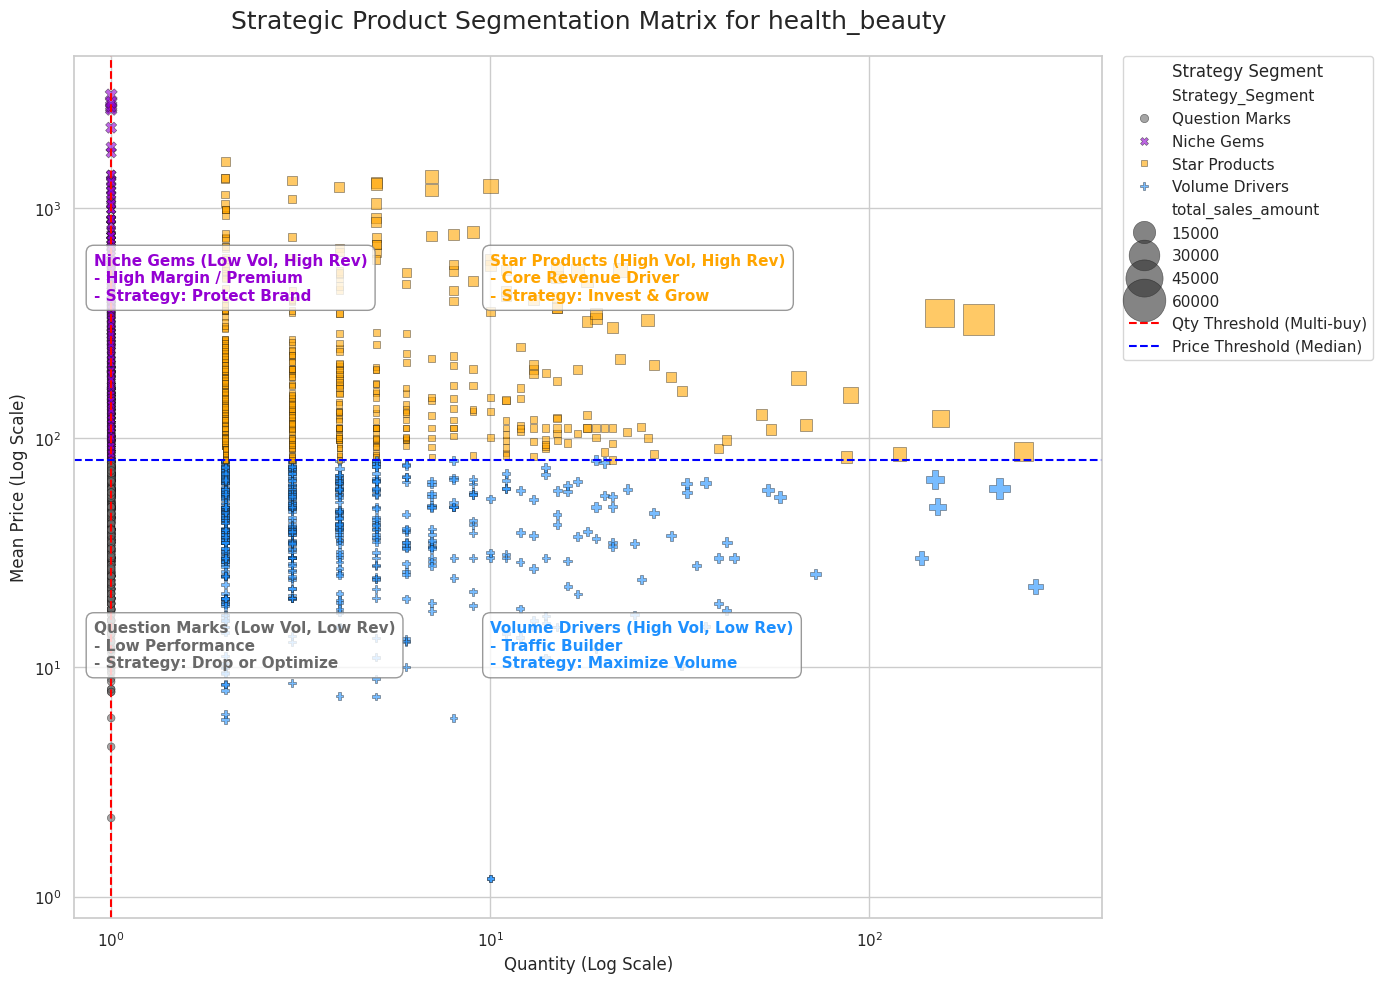

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. 데이터 로드 (Load Data)
# 'sales_product_category' 변수 대신 실제 파일을 로드합니다.
target_category = 'health_beauty'
df = sales_product_category[sales_product_category['category'] == target_category].copy()

# 2. 기준점 설정 (Thresholds)
# Quantity: 1.5 (Split between single purchase vs multi-purchase)
# Price: 79.0 (Median Price)
qty_threshold = df['quantity'].median()
price_threshold = df['mean_price'].median()

# 3. 전략 그룹 세분화 함수 (Strategy Classification)
def classify_strategy(row):
    # Star Products: High Qty, High Price
    if row['quantity'] > qty_threshold and row['mean_price'] >= price_threshold:
        return 'Star Products'
    # Volume Drivers: High Qty, Low Price
    elif row['quantity'] > qty_threshold and row['mean_price'] < price_threshold:
        return 'Volume Drivers'
    # Niche Gems: Low Qty, High Price
    elif row['quantity'] <= qty_threshold and row['mean_price'] >= price_threshold:
        return 'Niche Gems'
    # Question Marks: Low Qty, Low Price
    else:
        return 'Question Marks'

# Apply classification
df['Strategy_Segment'] = df.apply(classify_strategy, axis=1)

palette_dict = {                     
        'Star Products': '#FFA500',
        'Volume Drivers': '#1E90FF',
        'Niche Gems': '#9400D3',
        'Question Marks': "#696969" 
    }

# 4. 시각화 (Visualization)
plt.figure(figsize=(14, 10))

# Scatter Plot
scatter = sns.scatterplot(
    data=df, 
    x='quantity', 
    y='mean_price', 
    hue='Strategy_Segment',       # Color by Segment
    size='total_sales_amount',    # Bubble Size by Revenue
    sizes=(30, 1000),             # Bubble Size Range
    style='Strategy_Segment',     # Marker Style
    palette=palette_dict,
    alpha=0.6,
    edgecolor='k'
)

# 5. 축 설정 (Log Scale Axis)
plt.xscale('log')
plt.yscale('log')

# Add Threshold Lines
plt.axvline(x=qty_threshold, color='red', linestyle='--', linewidth=1.5, label='Qty Threshold (Multi-buy)')
plt.axhline(y=price_threshold, color='blue', linestyle='--', linewidth=1.5, label='Price Threshold (Median)')

# 6. Quadrant Annotation (English Text to avoid font warnings)
box_style = dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round,pad=0.5')

# Top-Left: Niche Gems
plt.text(x=0.9, y=400, 
         s='Niche Gems (Low Vol, High Rev)\n- High Margin / Premium\n- Strategy: Protect Brand', 
         fontsize=11, fontweight='bold', color=palette_dict['Niche Gems'], ha='left', bbox=box_style)

# Top-Right: Star Products
plt.text(x=10, y=400, 
         s='Star Products (High Vol, High Rev)\n- Core Revenue Driver\n- Strategy: Invest & Grow', 
         fontsize=11, fontweight='bold', color=palette_dict['Star Products'], ha='left', bbox=box_style)

# Bottom-Right: Volume Drivers
plt.text(x=10, y=10, 
         s='Volume Drivers (High Vol, Low Rev)\n- Traffic Builder\n- Strategy: Maximize Volume', 
         fontsize=11, fontweight='bold', color=palette_dict['Volume Drivers'], ha='left', bbox=box_style)

# Bottom-Left: Question Marks
plt.text(x=0.9, y=10, 
         s='Question Marks (Low Vol, Low Rev)\n- Low Performance\n- Strategy: Drop or Optimize', 
         fontsize=11, fontweight='bold', color=palette_dict['Question Marks'], ha='left', bbox=box_style)

# 7. Layout & Labels
plt.title(f"Strategic Product Segmentation Matrix for {target_category}", fontsize=18, pad=20)
plt.xlabel('Quantity (Log Scale)', fontsize=12)
plt.ylabel('Mean Price (Log Scale)', fontsize=12)

# Legend adjustments
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., title='Strategy Segment')
plt.xlim(0.8, df['quantity'].max() * 1.5) # Adjust X-axis margin

plt.tight_layout()
plt.show()

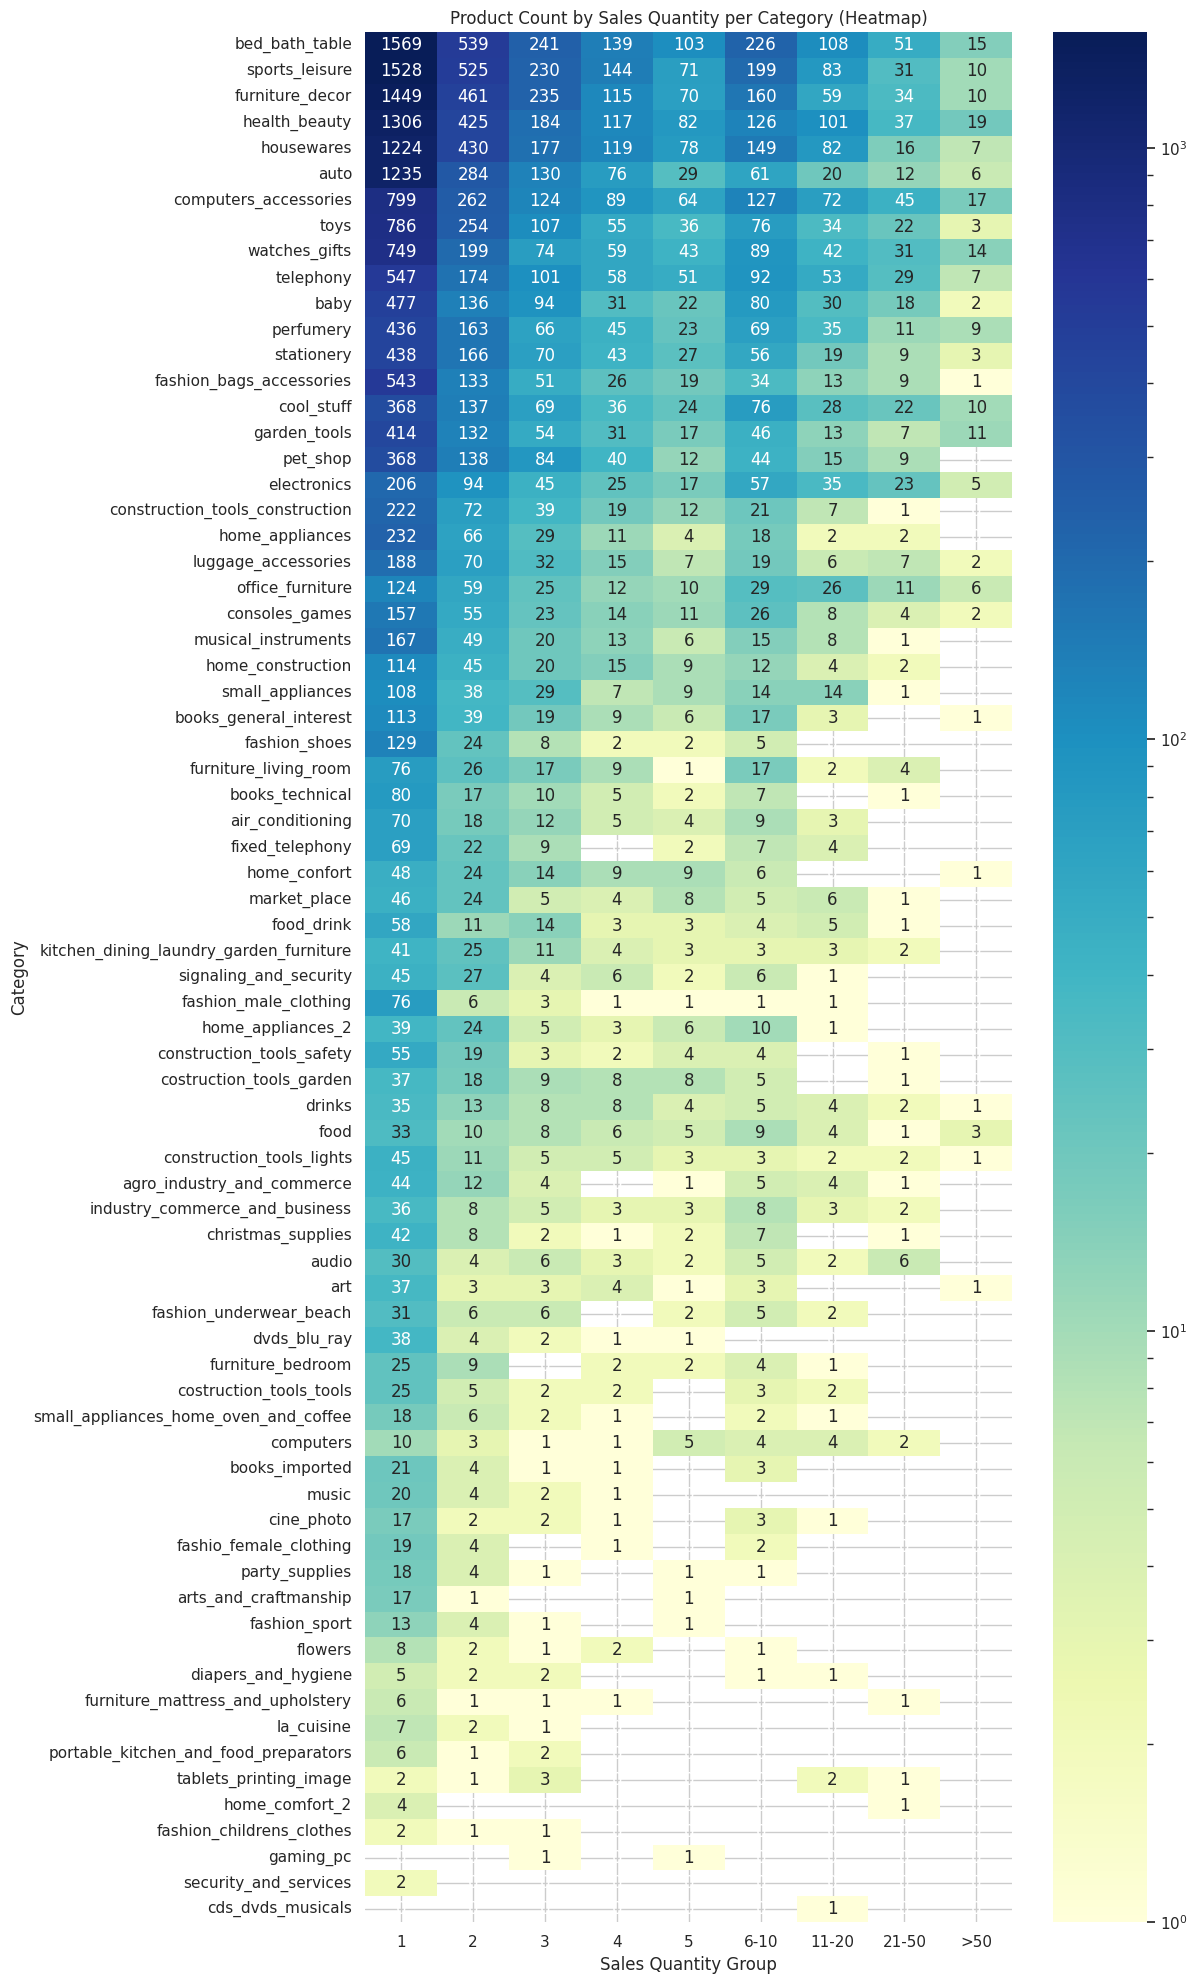

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

# 1. 데이터 로드
df = sales_product_category.copy()

# 2. 판매량(Quantity) 구간 그룹화 함수 정의
# 롱테일의 앞부분(1~5)은 세밀하게, 뒷부분(Tail)은 묶어서 표현
def group_quantity(q):
    if q <= 5:
        return str(q)
    elif q <= 10:
        return '6-10'
    elif q <= 20:
        return '11-20'
    elif q <= 50:
        return '21-50'
    else:
        return '>50'

# 함수 적용하여 새로운 컬럼 생성
df['quantity_group'] = df['quantity'].apply(group_quantity)

# 히트맵의 컬럼 순서 지정 (논리적 순서대로)
col_order = ['1', '2', '3', '4', '5', '6-10', '11-20', '21-50', '>50']

# 3. 피벗 테이블 생성 (카테고리별 x 판매량 구간별 상품 수 집계)
pivot_df = df.pivot_table(index='category', 
                          columns='quantity_group', 
                          values='product_id', 
                          aggfunc='count', 
                          fill_value=0)

# 컬럼 순서 재정렬
pivot_df = pivot_df[col_order]

# 정렬: 전체 상품 수가 많은 카테고리 순서로 정렬하여 보기 좋게 만듦
pivot_df['total'] = pivot_df.sum(axis=1)
pivot_df = pivot_df.sort_values('total', ascending=False)
pivot_df_plot = pivot_df.drop(columns='total')

# 4. 히트맵 시각화
plt.figure(figsize=(12, 20)) # 카테고리가 많으므로 세로 길이를 충분히 확보

# LogNorm을 사용하여 값의 차이가 커도 색상 변화를 잘 보여주도록 설정
sns.heatmap(pivot_df_plot, 
            annot=True,     # 각 셀에 숫자 표시
            fmt='d',        # 정수 포맷
            cmap='YlGnBu',  # 색상 테마 (노랑-초록-파랑)
            norm=mcolors.LogNorm()) 

plt.title('Product Count by Sales Quantity per Category (Heatmap)')
plt.xlabel('Sales Quantity Group')
plt.ylabel('Category')
plt.tight_layout()
plt.show()